<a href="https://colab.research.google.com/github/parvezmosaraf/Machine-Learning-Project/blob/main/Business%20Card%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
def add_custom_layers_vgg19():
    #Adding custom Layers 
    model_vgg19 = create_Base_model_from_VGG19()
    x = model_vgg19.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x) # adding a dropout layer
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x) # adding a convolutional layer
    x = tf.keras.layers.MaxPooling2D((2, 2))(x) # adding a max pooling layer
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)   
    # creating the final model 
    final_model = tf.keras.models.Model(
        inputs = model_vgg19.input, 
        outputs = predictions)
     
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return final_model

add_custom_layers_vgg19().summary()


NameError: ignored

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

 

Government of The People's Republic
) of Bangladesh

NATIONAL ID CARD

Name 5
Father's Name : AN
Mother's Name :
Dateof Birth:

IDNO

 



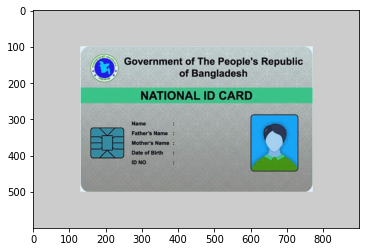

In [ ]:
img = cv2.imread("/content/1511274111.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [ ]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [ ]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    900   
1       2         1          1        0         0         0   158  327      2   
2       3         1          1        1         0         0   158  327      2   
3       4         1          1        1         1         0   158  327      2   
4       5         1          1        1         1         1   158  327      2   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
45      5         1          5        1         1         1   272  414     39   
46      2         1          6        0         0         0   171  129     56   
47      3         1          6        1         0         0   171  129     56   
48      4         1          6        1         1         0   171  129     56   
49      5         1          6        1         1         1   171  129     56   

    height  conf 

In [ ]:
from pytesseract import Output

img = cv2.imread('/content/1511274111.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


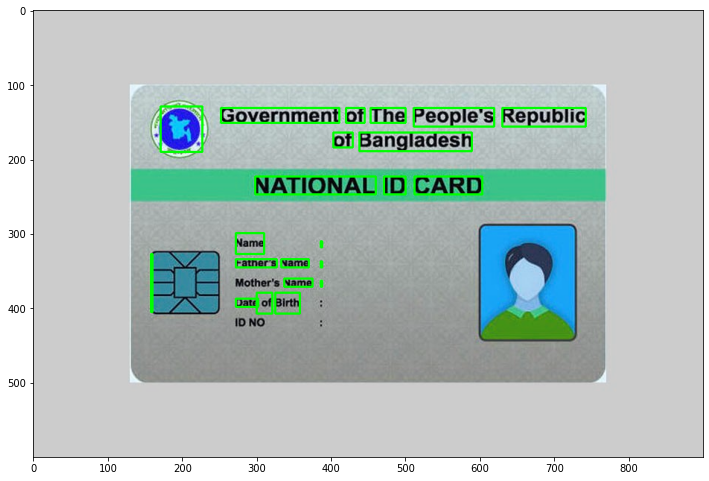

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)